In [1048]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.utils import shuffle
import pandas as pd

In [1050]:
n = 10016
batch_size = 32

In [1052]:
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing target values
df = df.dropna(subset=['survived'])

# Select numeric features
features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
df = df.dropna(subset=features)  # Drop rows where *any* feature is NaN

# Extract features and target
X = df[features].values
y = df['survived'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Sanity check
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique y values:", np.unique(y, return_counts=True))


X shape: (714, 5)
y shape: (714,)
Unique y values: (array([0, 1]), array([424, 290]))


In [1054]:
X.shape

(714, 5)

In [1056]:
Xs = []
Ys = []
batch_num = int(np.ceil(len(X) / batch_size)) - 1
batch_num

22

In [1058]:
for i in range(batch_num):
    start = i * batch_size
    end = start + batch_size
    Xs.append(X[start:end])
    Ys.append(Y[start:end])
len(Xs)

22

In [1060]:
Xs = np.array(Xs[:-1]).reshape(batch_num-1, batch_size, 5, 1)
Ys = np.array(Ys[:-1]).reshape(batch_num-1, batch_size, 1, 1)

In [1062]:
size = [5, 10, 20, 5, 1]

In [1064]:
weights = [0]
biases = [0]
for i in range(0, len(size) - 1):
    weights.append(np.random.rand(size[i + 1], size[i]))
    biases.append(np.random.rand(size[i + 1], 1))

In [1066]:
weights

[0,
 array([[0.2010681 , 0.06848174, 0.81421182, 0.68095657, 0.22811698],
        [0.22510682, 0.22862767, 0.90983385, 0.99901198, 0.09778822],
        [0.7374772 , 0.87862621, 0.41724194, 0.2563717 , 0.57475815],
        [0.97084372, 0.76962905, 0.16876432, 0.14558219, 0.97968385],
        [0.7842365 , 0.93579671, 0.2250296 , 0.53989802, 0.55452207],
        [0.25272163, 0.60435459, 0.14142012, 0.27278277, 0.96422105],
        [0.61674422, 0.57144394, 0.5097466 , 0.9697523 , 0.08788044],
        [0.75436777, 0.24194216, 0.15800456, 0.15498027, 0.33139754],
        [0.38943406, 0.85586124, 0.73510209, 0.1271316 , 0.26692529],
        [0.07973923, 0.39769984, 0.56359825, 0.57149975, 0.23865236]]),
 array([[7.34076955e-01, 1.89546425e-01, 5.56379138e-01, 5.10560167e-01,
         8.66681986e-01, 8.45088917e-01, 1.27907095e-01, 3.02960312e-01,
         9.27523845e-01, 7.94954557e-01],
        [9.29848865e-01, 1.62777130e-01, 9.55705986e-01, 5.74695245e-01,
         5.35454873e-01, 2.240326

In [1068]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [1070]:
def L(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

In [1072]:
def feed_forward(xi, weights, biases):
    activations = [xi]
    z1 = weights[1] @ xi + biases[1]
    a1 = sigmoid(z1)
    activations.append(a1)
    for i in range(2, len(weights)):
        zn = weights[i] @ activations[-1] + biases[i]
        an = sigmoid(zn)
        activations.append(an)
    return activations

In [1074]:
def sigmoid_derivative(y):
    return y * ( 1 - y )

In [1076]:
def backprop(weights, biases, xi, y, activations):
    deltas = [0] * len(activations)
    dL_dwK = [0] * len(activations)
    dL_dbK = [0] * len(activations)
    
    deltas[-1] = ( activations[-1] - y ) * sigmoid_derivative(activations[-1])
    dL_dwK[-1] = deltas[-1] @ activations[-1].T
    dL_dbK[-1] = deltas[-1]
    
    for i in range(len(deltas)-2, 0, -1):
        deltas[i] = ( weights[i+1].T @ deltas[ i + 1 ] ) * sigmoid_derivative(activations[i])
        dL_dwK[i] = deltas[i] @ activations[ i - 1 ].T
        dL_dbK[i] = deltas[i]
    
    return dL_dwK, dL_dbK

In [1078]:
act = feed_forward(Xs[0][2], weights, biases)
print(act)
bc = backprop(weights, biases, Xs[0][2], Ys[0][2], act)[0]
for w in bc:
    if type(w) is not int: print(w.shape)

[array([[ 0.91123237],
       [-0.25482473],
       [-0.55170307],
       [-0.50589515],
       [-0.50621356]]), array([[0.45422731],
       [0.49206232],
       [0.593489  ],
       [0.51616995],
       [0.50829682],
       [0.52268751],
       [0.4926125 ],
       [0.58916972],
       [0.47567245],
       [0.53811788]]), array([[0.97126075],
       [0.93663563],
       [0.97028402],
       [0.98242849],
       [0.94979757],
       [0.95702501],
       [0.9306446 ],
       [0.97509872],
       [0.96743367],
       [0.92988048],
       [0.97085693],
       [0.91270822],
       [0.98079298],
       [0.96856086],
       [0.91677278],
       [0.97949281],
       [0.96156811],
       [0.90137319],
       [0.90341007],
       [0.98446015]]), array([[0.99987154],
       [0.99974534],
       [0.99999668],
       [0.99999482],
       [0.99993109]]), array([[0.97808449]])]
(10, 5)
(20, 10)
(5, 20)
(1, 1)


In [1080]:
epochs = 40
lr = 0.8
loss = []

In [1082]:
for i in tqdm(range(epochs)):
    epochloss = 0
    for j in range(batch_num-1):
        for i, xi in enumerate(Xs[j]):
            activations = feed_forward(xi, weights, biases)
            epochloss += L(activations[-1], Ys[j,i])
    
            dL_dw, dL_db = backprop(weights, biases, xi, Ys[j,i], activations)
            
            for i, w in enumerate(weights):
                w -= lr * dL_dw[i]
            for i, b in enumerate(biases):
                b -= lr * dL_db[i]
            
    loss.append(epochloss / n)

100%|███████████████████████████████████████████| 40/40 [00:01<00:00, 38.70it/s]


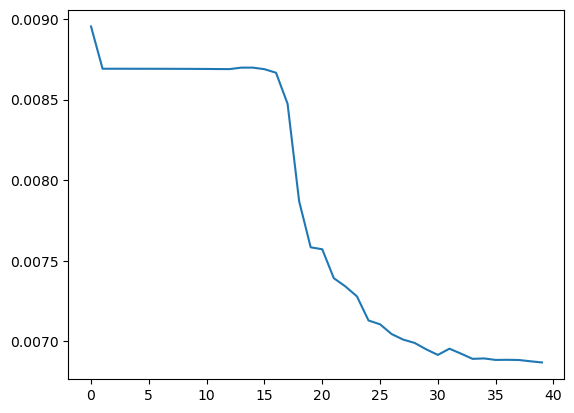

In [1083]:
xcoord = np.array([n for n in range(epochs)]).reshape(epochs, 1)
ycoord = np.array(loss).reshape(epochs, 1)
plt.plot(xcoord, ycoord)
#plt.xscale('log')
#plt.yscale('log')

In [1084]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [1085]:
ex = 0
se = 1

In [1086]:
Ys[0, ex]

array([[0]])

In [1092]:
feed_forward(Xs[0, ex], weights, biases)[-1]

array([[0.14630706]])

In [1094]:
s = 0
for se in range(len(Xs)):
    for i in range(32):
        if (feed_forward(Xs[se, i], weights, biases)[-1] >= 0.5 and Ys[se, i] != 1) or (feed_forward(Xs[se, i], weights, biases)[-1] < 0.5 and Ys[se, i] != 0):
            s += 1

In [1096]:
s

183

In [1098]:
print(f'{((len(Xs) * 32 - s) / (len(Xs) * 32) * 100):.2f}% Accuracy')

72.77% Accuracy
